## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

pd.set_option('display.max_columns', 500)

## Reading CSV Data

In [2]:
df = pd.read_csv('WISDM_ar_v1.1_transformed.csv', na_values=["?"])
df.drop(["UNIQUE_ID", "XAVG", "ZSTANDDEV"],axis=1, inplace=True)
df.head()

,user,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y0,Y1,Y2,Y3,Y4,Y5,Y6,Y7,Y8,Y9,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,YAVG,ZAVG,XPEAK,YPEAK,ZPEAK,XABSOLDEV,YABSOLDEV,ZABSOLDEV,XSTANDDEV,YSTANDDEV,RESULTANT,class
0,33,0.04,0.09,0.14,0.12,0.11,0.10,0.08,0.13,0.13,0.08,0.09,0.10,0.11,0.11,0.08,0.04,0.16,0.13,0.10,0.03,0.12,0.08,0.09,0.12,0.10,0.10,0.08,0.11,0.12,0.10,8.40,1.76,2075.00,293.94,1550.00,3.29,7.21,4.00,4.05,8.17,11.96,Jogging
1,33,0.12,0.12,0.06,0.07,0.11,0.10,0.11,0.09,0.12,0.10,0.12,0.11,0.07,0.10,0.13,0.13,0.06,0.11,0.10,0.04,0.11,0.11,0.11,0.09,0.12,0.10,0.11,0.10,0.07,0.08,7.62,1.43,1525.00,269.44,1233.33,4.23,6.88,4.05,5.43,8.19,12.05,Jogging
2,33,0.14,0.09,0.11,0.09,0.09,0.11,0.12,0.08,0.05,0.12,0.09,0.10,0.12,0.10,0.10,0.12,0.08,0.07,0.10,0.06,0.07,0.11,0.10,0.09,0.08,0.11,0.11,0.09,0.10,0.12,7.77,2.39,1766.67,248.65,1780.00,4.18,6.89,4.07,5.55,8.19,11.99,Jogging
3,33,0.06,0.10,0.09,0.09,0.11,0.07,0.12,0.10,0.14,0.14,0.12,0.08,0.11,0.10,0.10,0.11,0.11,0.10,0.08,0.11,0.10,0.10,0.11,0.10,0.09,0.07,0.12,0.14,0.07,0.11,9.57,0.49,2525.00,709.09,1380.00,2.26,4.13,2.49,2.87,4.95,10.69,Walking
4,33,0.12,0.11,0.10,0.08,0.10,0.14,0.10,0.11,0.08,0.07,0.10,0.11,0.07,0.09,0.10,0.11,0.10,0.11,0.14,0.09,0.10,0.09,0.11,0.10,0.11,0.11,0.08,0.09,0.14,0.10,9.76,0.51,1075.00,3300.00,1775.00,2.29,3.94,2.41,3.08,4.64,10.80,Walking


## Visualizing the Number Values in each Classes

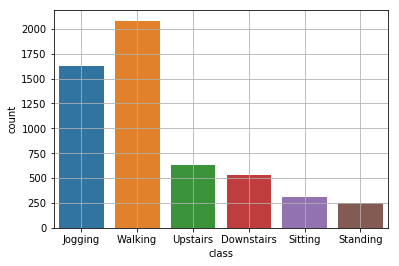

In [3]:
sns.countplot(df["class"])
plt.grid()
plt.show()

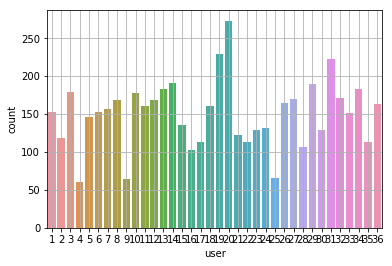

In [4]:
sns.countplot(df["user"])
plt.grid()
plt.show()

## transform non-numerical labels to numerical labels.

In [5]:
clEnc = LabelEncoder()
df["class"] = clEnc.fit_transform(df["class"])
clEnc.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

## getting corrilation of each atributes with Dependent Variables

In [6]:
corr_df = df.corr()[['user', 'class']] 
corr_df[((corr_df > 0.1) | (corr_df < -0.1))]

,user,class
user,1.000000,NaN
X0,NaN,NaN
X1,NaN,NaN
X2,NaN,NaN
X3,NaN,NaN
X4,NaN,NaN
X5,NaN,NaN
X6,NaN,NaN
X7,NaN,NaN
X8,NaN,NaN


## applying log transformation

In [7]:
df['XPEAK'] = np.log(df['XPEAK'])
df['YPEAK'] = np.log(df['YPEAK'])
df['ZPEAK'] = np.log(df['ZPEAK'])

## filling na values

In [8]:
df['XPEAK'] = df['XPEAK'].fillna(df['XPEAK'].mean())
df['YPEAK'] = df['YPEAK'].fillna(df['YPEAK'].mean())
df['ZPEAK'] = df['ZPEAK'].fillna(df['ZPEAK'].mean())

## spliting data into Dependent (X) and Independent (Y) Variables

In [9]:
# X = df[['YAVG', 'ZAVG', 'XPEAK', 'YPEAK', 'ZPEAK', 'XABSOLDEV', 'YABSOLDEV',
#        'ZABSOLDEV', 'XSTANDDEV', 'YSTANDDEV', 'ZSTANDDEV', 'RESULTANT']]
X = df.drop(["user", "class"], 1)
Y = df[["user", "class"]]

## spliting Data into train test split

In [10]:
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=.1, random_state=10)
trainX.shape, trainY.shape

((4876, 41), (4876, 2))

## Defining weights of each Classes

In [11]:
weight_user = dict(1 - trainY['user'].value_counts(normalize=True))
weight_user

{20: 0.9497538966365874,
 19: 0.956726825266612,
 31: 0.9575471698113207,
 29: 0.9649302707136997,
 14: 0.965135356849877,
 13: 0.965135356849877,
 34: 0.966160787530763,
 3: 0.9669811320754716,
 10: 0.9682116488925349,
 26: 0.9686218211648893,
 32: 0.9688269073010665,
 27: 0.9690319934372437,
 8: 0.9690319934372437,
 12: 0.9696472518457753,
 11: 0.970467596390484,
 7: 0.970467596390484,
 36: 0.9706726825266612,
 18: 0.9708777686628384,
 33: 0.9710828547990156,
 6: 0.9721082854799016,
 1: 0.9721082854799016,
 5: 0.9731337161607876,
 15: 0.9745693191140279,
 23: 0.9753896636587367,
 24: 0.9757998359310911,
 30: 0.9762100082034455,
 21: 0.9780557834290402,
 17: 0.9786710418375718,
 35: 0.9790812141099262,
 2: 0.9790812141099262,
 22: 0.9792863002461034,
 28: 0.9796964725184577,
 16: 0.9821575061525841,
 25: 0.9881050041017228,
 9: 0.9883100902379,
 4: 0.9889253486464316}

In [12]:
weight_class = dict(1- trainY['class'].value_counts(normalize=True))
weight_class

{5: 0.617104183757178,
 1: 0.7024200164068909,
 4: 0.8812551271534044,
 0: 0.9038146021328958,
 2: 0.9425758818703855,
 3: 0.9528301886792453}

## Model

In [13]:
csf = RandomForestClassifier(n_estimators=500, class_weight=[weight_user, weight_class])
csf.fit(trainX, trainY)
pred = csf.predict(testX)

## Accuracy

In [14]:
print('Accuracy with User : ', round((pred[:,0] == testY.iloc[:,0]).sum()/len(pred), 3))
print('Accuracy with Class : ', round((pred[:,1] == testY.iloc[:,1]).sum()/len(pred), 3))

Accuracy with User :  0.884
Accuracy with Class :  0.921


In [15]:
pred = pd.DataFrame(pred, columns=['user', 'class'])

In [16]:
pred.iloc[:,1] = clEnc.inverse_transform(pred.iloc[:,1])

## Prediction 

In [17]:
pred

,user,class
0,17,Upstairs
1,12,Sitting
2,21,Downstairs
3,24,Walking
4,18,Jogging
5,29,Standing
6,19,Jogging
7,21,Upstairs
8,20,Walking
9,1,Walking


## Confusion Matrix

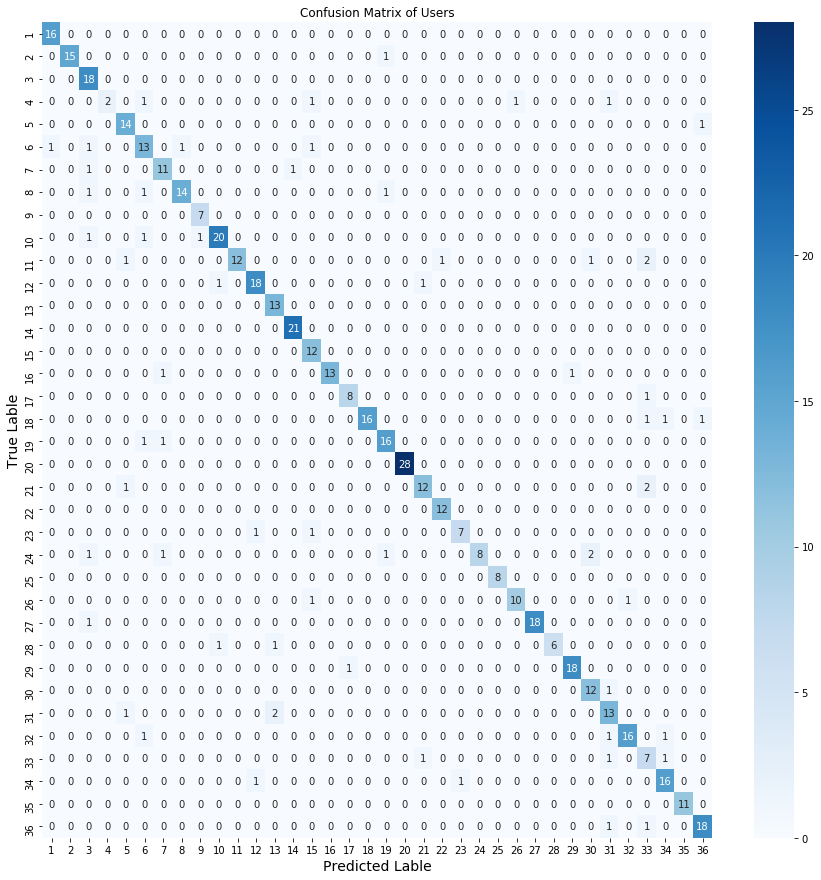

In [18]:
plt.figure(figsize=(15,15))
df_cm = pd.DataFrame(confusion_matrix(testY.iloc[:,0], pred.iloc[:,0]), index = [i for i in range(1,37)], columns = [i for i in  range(1,37)])
sns.heatmap(df_cm, cmap = plt.cm.Blues, annot=True)
plt.xlabel('Predicted Lable', fontsize = 14)
plt.ylabel('True Lable', fontsize = 14)
plt.title('Confusion Matrix of Users')
plt.show()

In [19]:
testY.iloc[:,1] = clEnc.inverse_transform(testY.iloc[:,1])

D:\SOFTWARE\Data\Anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


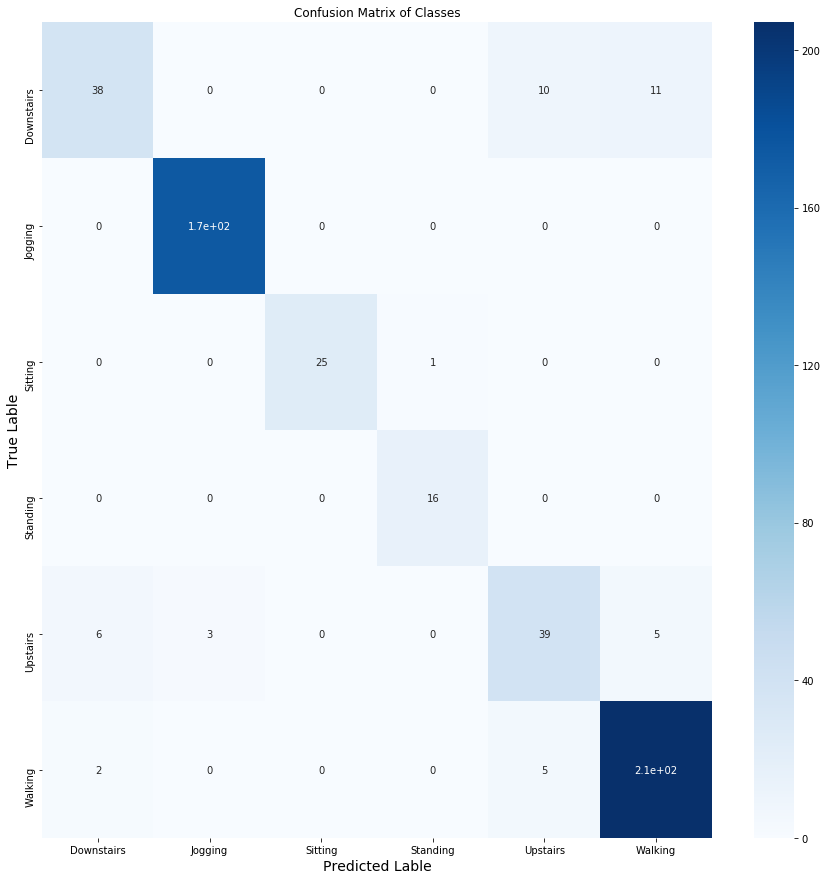

In [20]:
plt.figure(figsize=(15,15))
df_cm = pd.DataFrame(confusion_matrix(testY.iloc[:,1], pred.iloc[:,1]), index = clEnc.classes_, columns = clEnc.classes_)
sns.heatmap(df_cm, cmap = plt.cm.Blues, annot=True)
plt.xlabel('Predicted Lable', fontsize = 14)
plt.ylabel('True Lable', fontsize = 14)
plt.title('Confusion Matrix of Classes')
plt.show()